# Question 1


#### 1. Using Sklearn

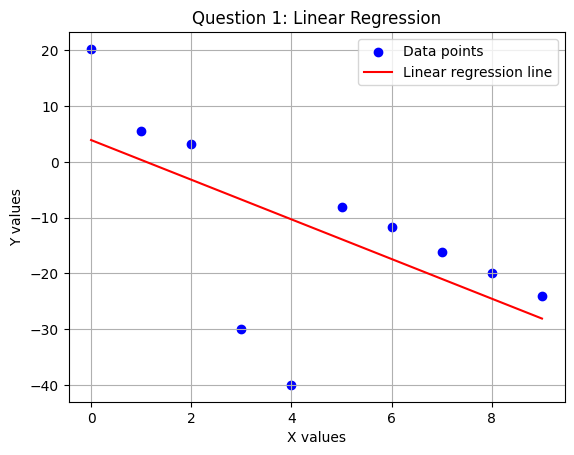

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import sklearn.preprocessing as preprocessing
import sympy as sp
from IPython.display import display, Math

x = np.linspace(0, 9 ,10)
X = x.reshape(-1, 1)
y = np.array([20.26, 5.61, 3.14, -30, -40, -8.13, -11.73, -16.08, -19.95, -24.03])
y_ = -4*x + 12
# Create linear regression model
model = linear_model.LinearRegression()
model.fit(X, y)

# plot
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, model.predict(X), color='red', label='Linear regression line')
plt.title('Question 1: Linear Regression')
plt.xlabel('X values')
plt.ylabel('Y values')
plt.legend()
plt.grid()
plt.show()

#### Equation of the linear regression line

<IPython.core.display.Math object>

<IPython.core.display.Math object>

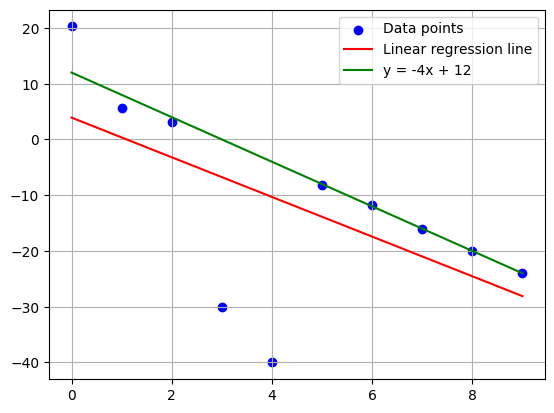

In [2]:
intercept = model.intercept_
slope = model.coef_[0]
score = model.score(X, y)

display(Math(fr"y = {slope:.2f}x + {intercept:.2f}"))
display(Math(fr"R^2 = {score:.2f}"))
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X, model.predict(X), color='red', label='Linear regression line')
plt.plot(x, y_, color='green', label='y = -4x + 12')
plt.grid()
plt.legend()
plt.show()


#### 2. Using Normal equation

In [3]:
# Add bias column (column of ones)
X_with_bias = np.hstack([np.ones((X.shape[0], 1)), X]) 
print(X_with_bias)

[[1. 0.]
 [1. 1.]
 [1. 2.]
 [1. 3.]
 [1. 4.]
 [1. 5.]
 [1. 6.]
 [1. 7.]
 [1. 8.]
 [1. 9.]]


In [4]:
w = np.linalg.inv(X_with_bias.T @ X_with_bias) @ X_with_bias.T @ y
print("(w0, w):", w)

(w0, w): [ 3.91672727 -3.55727273]


#### 3. Using GD in scratch

In [5]:
w = np.array([0.0, 0.0]) # w0, w
alpha = 0.001 # Learning rate
num_iterations = 1000 # Number of iterations

for i in range(num_iterations):
    y_pred = X_with_bias @ w
    gradient = -2* X_with_bias.T @ (y - y_pred)
    w = w- alpha * gradient
print("(w0, w):", w)

(w0, w): [ 3.90154875 -3.55485214]


# Calculate L()

In [6]:
N = 10
w0 = [12, 3.91]
w = [-4, -3.55]

beta = [pow(10, -6), 1, 1000]
def L(w0, w, beta):
    y_pred = w0 + w * x  # Calculate predicted values
    return (1/N) * np.sum((y - y_pred)**2 / ((y - y_pred)**2 + beta**2))

for i in beta:
    L_value = L(w0[0], w[0], i)
    display(Math(fr"L_1(w_0={w0[0]}, w={w[0]}, \beta={i}) = {L_value:.5f}"))

for i in beta:
    L_value = L(w0[1], w[1], i)
    display(Math(fr"L_2(w_0={w0[1]}, w={w[1]}, \beta={i}) = {L_value:.5f}"))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

$\beta$ = 1 is suitable
Model 1 is more robust as 0.4354

# Question 2

Application 1: Continuous Dependent Variable → Regression <br>
Application 2: Binary Dependent Variable → Classification

Table 2: MSE and BCE loss values for different predictions when y = 1
------------------------------------------------------------
True y = 1   Prediction δ    MSE        BCE       
------------------------------------------------------------
1            0.005           0.990      5.298     
1            0.01            0.980      4.605     
1            0.05            0.902      2.996     
1            0.1             0.810      2.303     
1            0.2             0.640      1.609     
1            0.3             0.490      1.204     
1            0.4             0.360      0.916     
1            0.5             0.250      0.693     
1            0.6             0.160      0.511     
1            0.7             0.090      0.357     
1            0.8             0.040      0.223     
1            0.9             0.010      0.105     
1            1.0             0.000      0.000     

Table format:
 True y  Prediction δ   MSE   BCE
      1         0.005 0.990 5.298
      1    

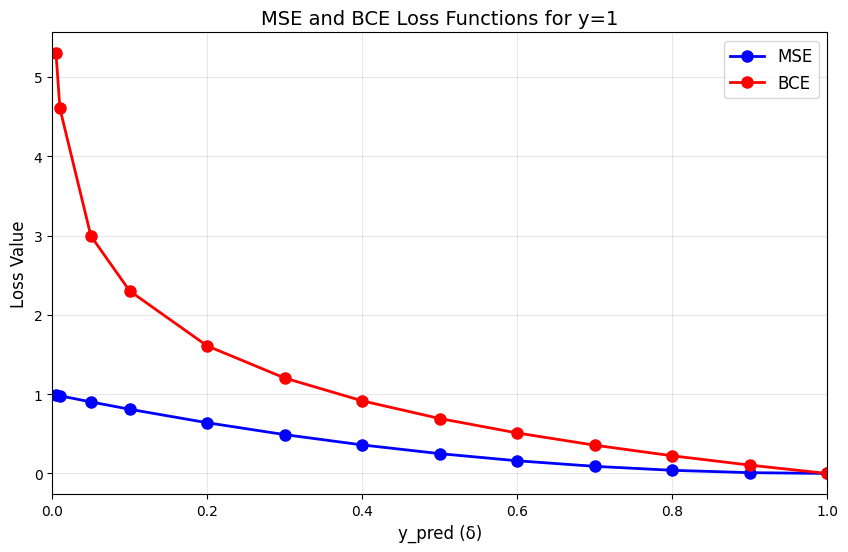

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [ ]:
import pandas as pd
def MSE(y_true, y_pred):
    return (y_true - y_pred)**2

def BCE(y_true, y_pred):
    return -(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

y_pred = np.array([0.005, 0.01, 0.05, 0.1, 0.2, 0.3,
                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

mse_values = []
bce_values = []


for pred in y_pred:
    mse_val = MSE(1, pred)
    
    # Handle BCE for y_pred = 1 (avoid log(0))
    if pred == 1.0:
        bce_val = 0  # When y_true = y_pred = 1, BCE = 0
    else:
        bce_val = BCE(1, pred)
    
    mse_values.append(mse_val)
    bce_values.append(bce_val)
    
    print(f"{'1':<12} {pred:<15} {mse_val:<10.3f} {bce_val:<10.3f}")

# Create DataFrame for better table display
df = pd.DataFrame({
    'True y': [1] * len(y_pred),
    'Prediction δ': y_pred,
    'MSE': mse_values,
    'BCE': bce_values
})

print("\nTable format:")
print(df.to_string(index=False, float_format='%.3f'))

# Plot both loss functions
plt.figure(figsize=(10, 6))
plt.plot(y_pred, mse_values, 'bo-', label='MSE', linewidth=2, markersize=8)
plt.plot(y_pred, bce_values, 'ro-', label='BCE', linewidth=2, markersize=8)
plt.title('MSE and BCE Loss Functions for y=1', fontsize=14)
plt.xlabel('y_pred (δ)', fontsize=12)
plt.ylabel('Loss Value', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xlim(0, 1)
plt.show()

# Display mathematical formulas
display(Math(r"\text{MSE} = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2"))
display(Math(r"\text{For single prediction: MSE} = (y - \hat{y})^2"))
display(Math(r"\text{BCE} = -\frac{1}{n}\sum_{i=1}^{n}[y_i \log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)]"))
display(Math(r"\text{For single prediction: BCE} = -[y \log(\hat{y}) + (1-y)\log(1-\hat{y})]"))

# Question 3

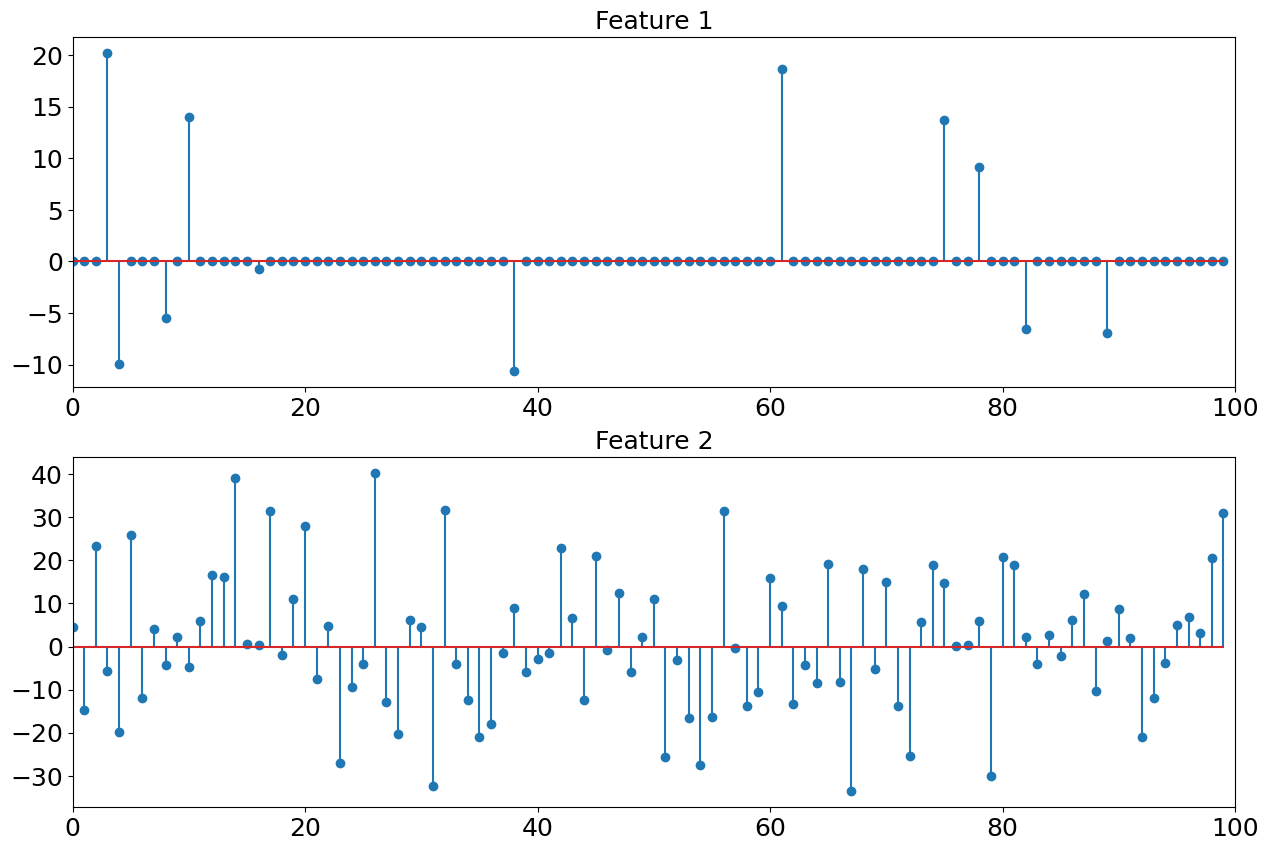

In [8]:
import numpy as np
import matplotlib.pyplot as plt
def generate_signal(signal_length, num_nonzero):
    signal = np.zeros(signal_length)
    nonzero_indices = np.random.choice(signal_length, num_nonzero,
    replace=False)
    nonzero_values = 10*np.random.randn(num_nonzero)
    signal[nonzero_indices] = nonzero_values
    return signal

signal_length = 100 # Total length of the signal
num_nonzero = 10 # Number of non-zero elements in the signal
your_index_no= 220212
sparse_signal = generate_signal(signal_length, num_nonzero)
sparse_signal[10] = (your_index_no % 10)*2 + 10

if your_index_no % 10 == 0:
    sparse_signal[10] = np.random.randn(1) + 30
    sparse_signal=sparse_signal/5
epsilon = np.random.normal(0, 15, signal_length ) #epsilon=epsilon[:, np.newaxis]

plt.figure(figsize=(15,10))

plt.subplot(2, 1, 1)
plt.xlim(0, signal_length)
plt.title("Feature 1", fontsize=18)
plt.xticks(fontsize=18) # Adjust x-axis tick label font size
plt.yticks(fontsize=18)
plt.stem(sparse_signal)

plt.subplot(2, 1, 2)
plt.xlim(0, signal_length)
plt.title("Feature 2", fontsize=18)
plt.stem(epsilon)
plt.xticks(fontsize=18) # Adjust x-axis tick label font size
plt.yticks(fontsize=18)
plt.show()

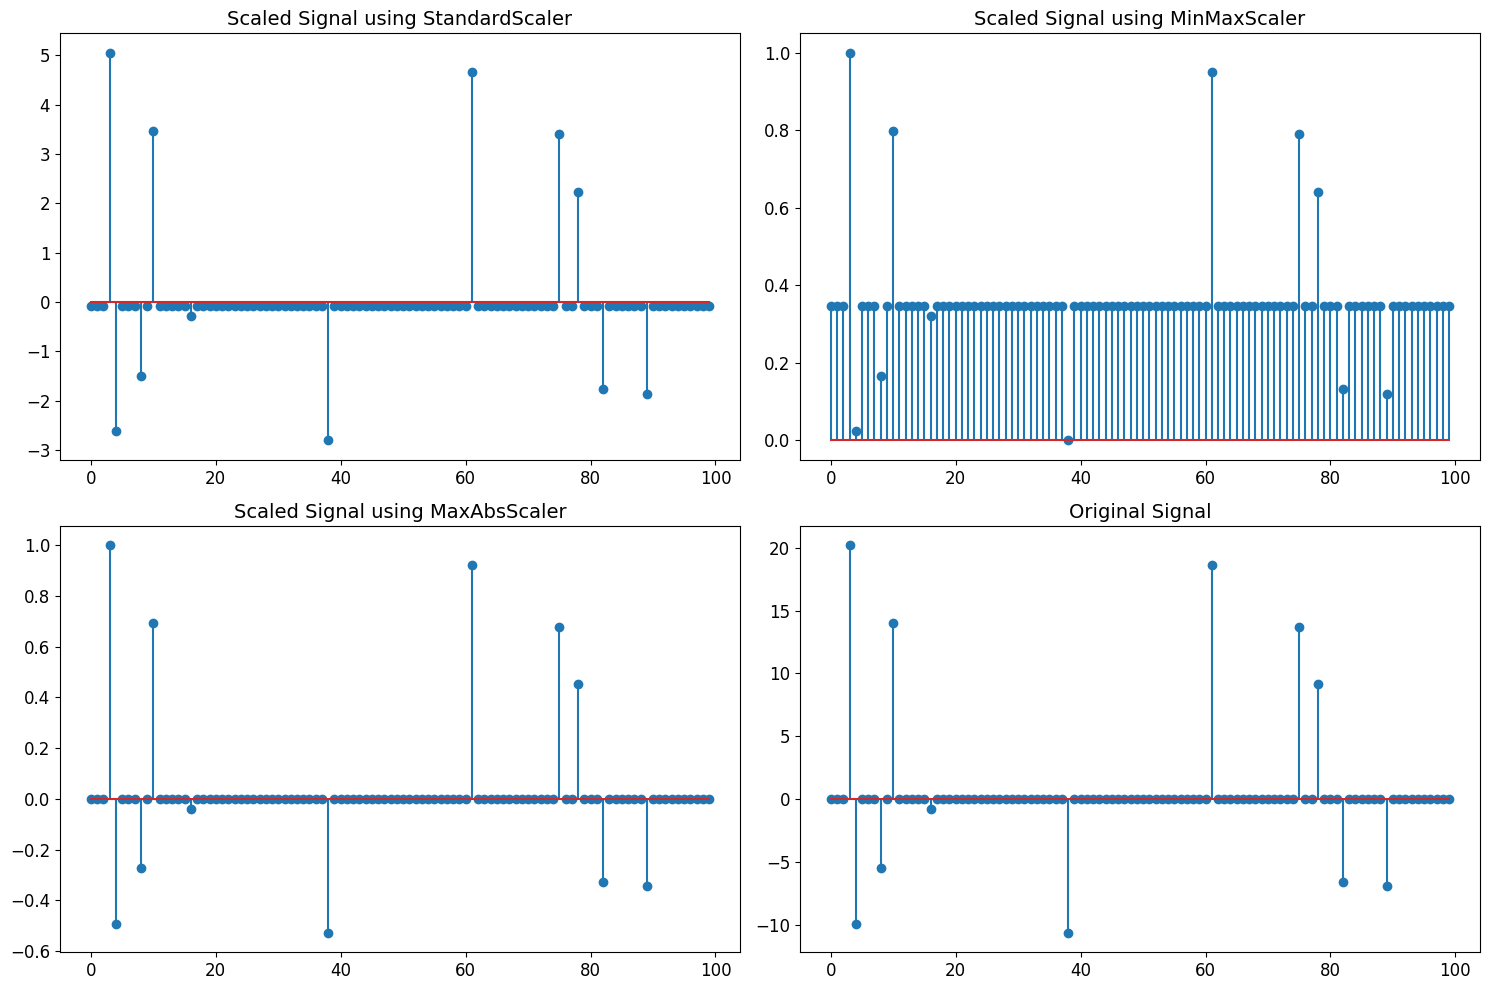

In [9]:
scalers = [preprocessing.StandardScaler(), preprocessing.MinMaxScaler(), preprocessing.MaxAbsScaler()]

plt.figure(figsize=(15, 10))

for idx, scaler in enumerate(scalers):
    scaler.fit(sparse_signal.reshape(-1, 1))
    sparse_signal_scaled = scaler.transform(sparse_signal.reshape(-1, 1))
    
    plt.subplot(2, 2, idx + 1)
    plt.title(f"Scaled Signal using {scaler.__class__.__name__}", fontsize=14)
    plt.stem(sparse_signal_scaled.flatten())
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
plt.subplot(2, 2, 4)
plt.title("Original Signal", fontsize=14)
plt.stem(sparse_signal)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

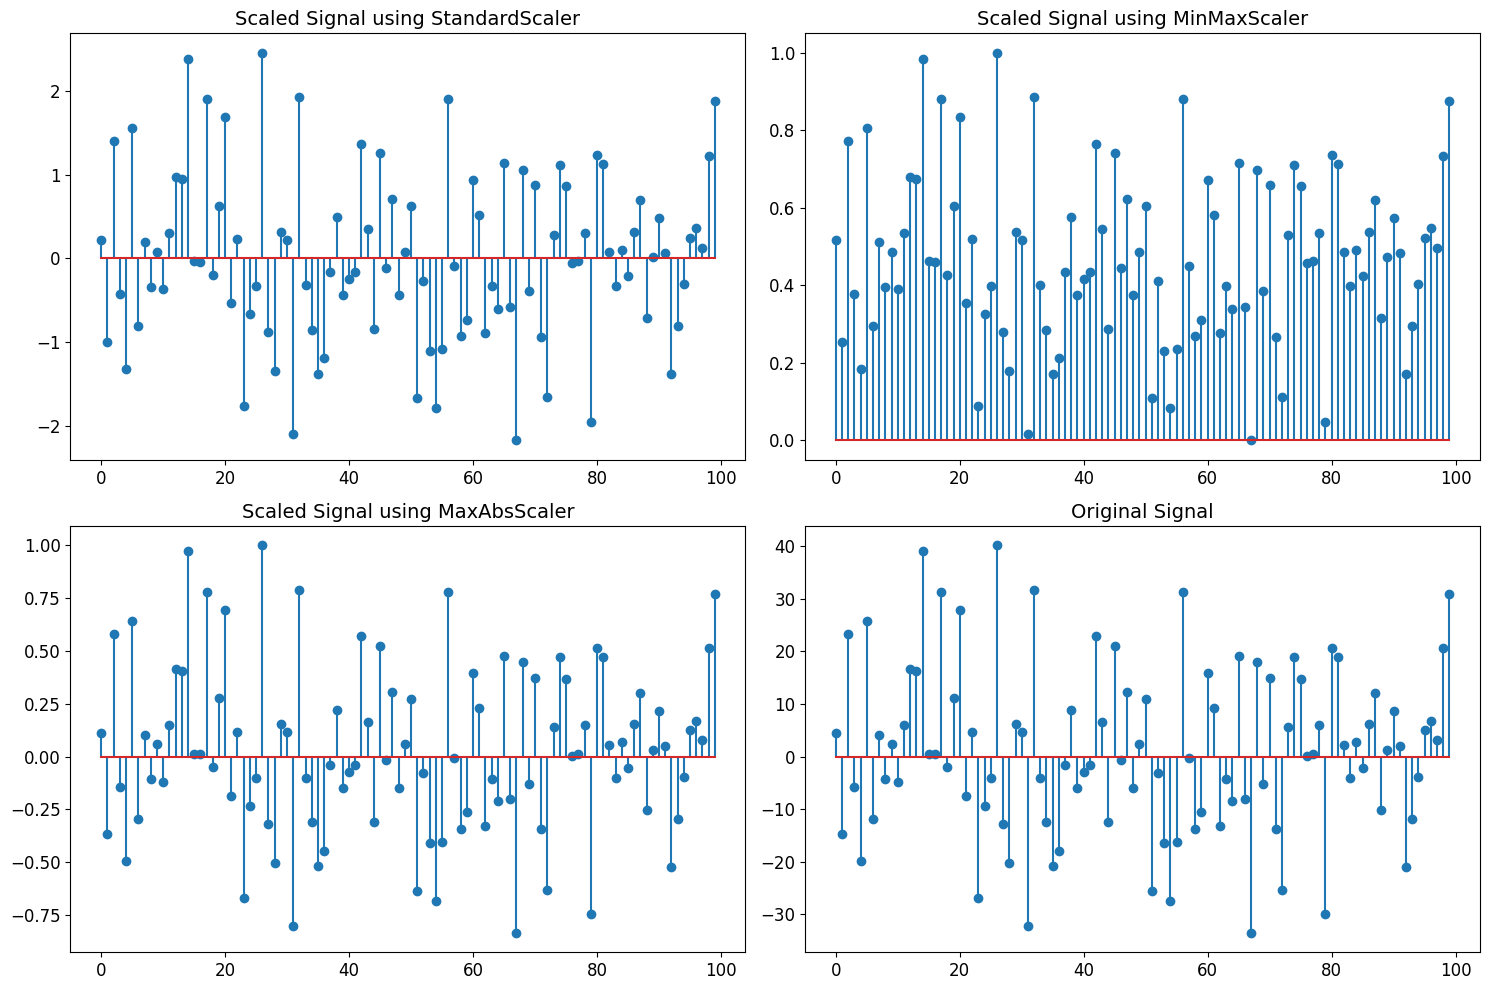

In [10]:
scalers = [preprocessing.StandardScaler(), preprocessing.MinMaxScaler(), preprocessing.MaxAbsScaler()]

plt.figure(figsize=(15, 10))

for idx, scaler in enumerate(scalers):
    scaler.fit(epsilon.reshape(-1, 1))
    epsilon_scaled = scaler.transform(epsilon.reshape(-1, 1))
    
    plt.subplot(2, 2, idx + 1)
    plt.title(f"Scaled Signal using {scaler.__class__.__name__}", fontsize=14)
    plt.stem(epsilon_scaled.flatten())
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
plt.subplot(2, 2, 4)
plt.title("Original Signal", fontsize=14)
plt.stem(epsilon)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()